### Import libraries

In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

### Drive Connection

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load files

In [3]:
data_path = '/content/drive/MyDrive/ColabSave/'
data = donnees_excel = pd.read_excel(data_path + 'data.xlsx', sheet_name="prestige")

((3870, 44), (1290, 43))

### TextPlot

In [25]:
var = "Qui doit assurer la mise à jour des informations sur ces réseaux ?"
dtaDiplome = data[data["Situation actuelle"]=="Diplomé"][["Adresse e-mail", var]]
dtaFiniss = data[data["Situation actuelle"]!="Diplomé"][["Adresse e-mail", var]]
dta = data[["Adresse e-mail", var]]

In [28]:
dummies = dtaFiniss[var].str.get_dummies(sep=',')
frequencies = dummies.sum()
dummies = dummies * frequencies

In [29]:
pd.DataFrame(dummies.max(axis=0))

,0
L' administration,2
Un étudiant et un membre de l'administration,36
Un étudiant élu ou choisi,1


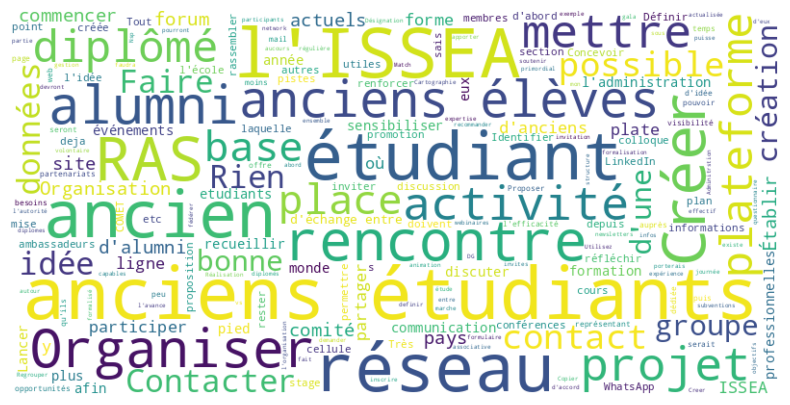

In [30]:
texte_suggestions = ' '.join(data["Que proposez-vous pour la mise sur pied d'un réseau Alumni à l'ISSEA ?"].dropna().astype(str))

mots_a_exclure = set(STOPWORDS)
mots_a_exclure.update(['alors', 'comme', 'le', 'de', 'et', 'la', 'pour', 'à', 'en',
                       'au', 'des','les','avec','du', 'aux', 'leur', 'sur','chaque','une',
                       'l', 'dans','ce', 'par', 'Il', 'il', 'avoir',"d'un","qu'il",'qui',
                       'non', 'est','aussi','donne', "C'est",'lui','ça','son','ou','je','Je',
                       'Oui','donc','que','tels','Celà','cette','nos','va','telle', 'Cela',
                       'être', 'outre','sein','si','autre','fois','cas','jour','créant','bon','ne',
                       'peut','sont','car','sa','pas','sans','un','se','ces','doit', "L'",'tous',
                       'leurs','lesquels','vers','Tenir','déjà','Tirer','d','ses','faut'])  # Ajoutez des mots spécifiques que vous souhaitez exclure

# Créez le nuage de mots en excluant certains mots
nuage_mots = WordCloud(width=800, height=400, background_color='white', stopwords=mots_a_exclure).generate(texte_suggestions)

# Affichez le nuage de mots à l'aide de matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(nuage_mots, interpolation='bilinear')
plt.axis('off')
plt.show()